[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



DATASET :

AFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :

MISSING VALUES IN EACH COLUMN :
user_location      46218
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags           27041
retweets               0
favorites              0
is_retweet             0
dtype: int64

AFTER REPLACING THE MISSING COLUMNS INTO A SINGLE CATEGORY :
user_location      0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
hashtags           0
retweets           0
favorites          0
is_retweet         0
dtype: int64

THE CORRELATION MATRIX :
                 user_followers  user_friends  user_favourites  user_verified  \
user_followers         1.000000     -0.003203        -0.031180       0.363375   
user_friends          -0.003203      1.000000         0.174074      -0.002809   
user_favourites       -0.031180      0.17

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

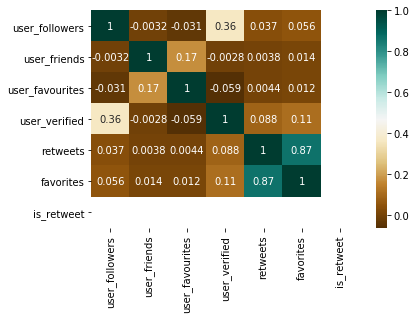

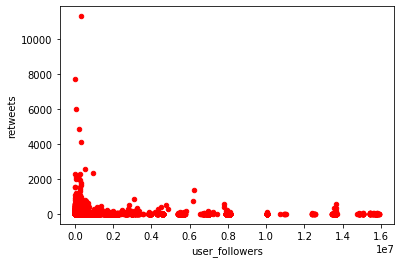

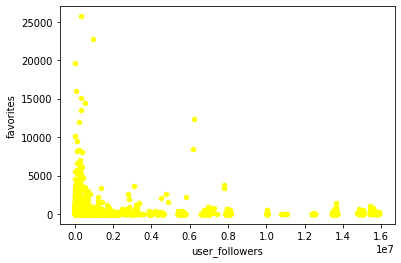

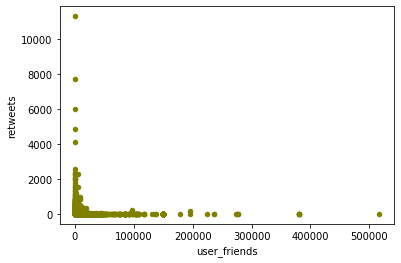

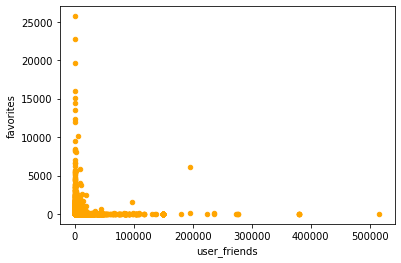

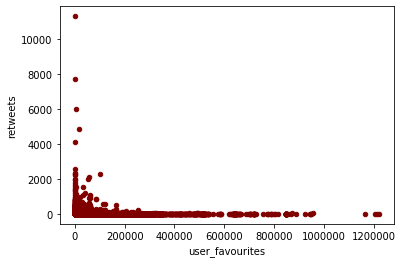

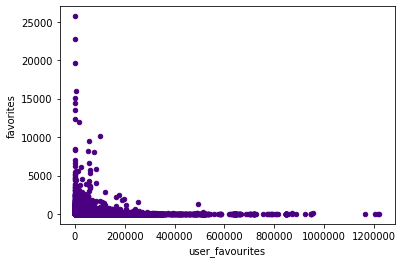

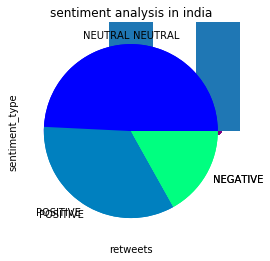

In [1]:
#Libraries needed
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale

#For Vader Analysis 
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#Importing dataset as data
data = pd.read_csv("C:/Users/Hxtreme/Documents/projects/vaccination_all_tweets.csv")
print("\nDATASET :")
data.head()

data.describe()
data.nunique()

#Data cleaning

#dropping unwanted columns
to_drop = ['user_name', 'user_description', 'user_created', 'source']
data.drop(to_drop, inplace=True, axis=1)
print("\nAFTER DROPPING UNWANTED COLUMNS FROM THE DATASET :")
data.head()

#making the twitter id as the index
data = data.set_index('id')

#missing values percent per column
print("\nMISSING VALUES IN EACH COLUMN :")
print(data.isnull().sum())

#since user_location and hashtags are text columns, we replace those missing values with "Unknown place" and "no hashtag" for better and accurate visualizations.
data["user_location"]=data["user_location"].fillna("Unkown place")
data["hashtags"]=data["hashtags"].fillna("No hashtag")

#ensuring there is no missing values
print("\nAFTER REPLACING THE MISSING COLUMNS INTO A SINGLE CATEGORY :")
print(data.isnull().sum())

#the correlation matrix
print("\nTHE CORRELATION MATRIX :")
print(data.corr())
print("\nTHE CORRELATION HEATMAP :")
sns.heatmap(data.corr(),cmap="BrBG",annot=True)

#EDA - Explaratory Data Analysis
#numerical vs. numerical
print("\nEXPLORATORY DATA ANALYSIS :")
data.plot.scatter(x="user_followers", y="retweets", color="red")
data.plot.scatter(x="user_followers", y="favorites", color="yellow")
data.plot.scatter(x="user_friends", y="retweets", color="olive")
data.plot.scatter(x="user_friends", y="favorites", color="orange")
data.plot.scatter(x="user_favourites", y="retweets", color="maroon")
data.plot.scatter(x="user_favourites", y="favorites", color="indigo")
data.plot.scatter(x="retweets", y="favorites", color="purple")

#categorical vs. numerical and categorical vs. categorical graphs could not be plotted sinnce there are more than 20,000 distinct values in each of these columns.

#vader analysis
print("\nVADER ANALYSIS :")
df=data.drop('user_location',1)
df=df.drop('user_followers',1)
df=df.drop('user_favourites',1)
df=df.drop('user_friends',1)
df=df.drop('user_verified',1)
df=df.drop('hashtags',1)
df=df.drop('favorites',1)
df=df.drop('retweets',1)
df=df.drop('is_retweet',1)

df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'
print("THE BAR CHART")
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")
print("THE PIE CHART")
df.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis", colormap = "winter")
print(df.head())

#Indian pie
g = data[(data.user_location=="India")]
g.head()
g['scores'] = g['text'].apply(lambda text: sid.polarity_scores(text))
g['compound'] = g['scores'].apply(lambda score_dict: score_dict['compound'])
g['sentiment_type']=''
g.loc[g.compound>0,'sentiment_type']='POSITIVE'
g.loc[g.compound==0,'sentiment_type']='NEUTRAL'
g.loc[g.compound<0,'sentiment_type']='NEGATIVE'
print("THE PIE CHART")
g.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis in india", colormap = "winter")

THE PIE CHART


,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,is_retweet
id,,,,,,,,,,,
1340539111971516416,"La Crescenta-Montrose, CA",405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0,False
1338158543359250433,"San Francisco, CA",834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,No hashtag,1,1,False
1337858199140118533,Your Bed,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0,False
1337855739918835717,"Vancouver, BC - Canada",49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",No hashtag,446,2129,False
1337854064604966912,Unkown place,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
1445962108055732232,Estados Unidos,3373,1472,129,False,2021-10-07 04:00:05,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0,False
1445956889305440264,"Bengaluru, India",21,0,2,False,2021-10-07 03:39:21,Pincode: 560011\nSPUTNIK V - Dose 1: 100 slots...,No hashtag,0,0,False
1445954643419226114,"Bengaluru, India",26,0,0,False,2021-10-07 03:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0,1,False


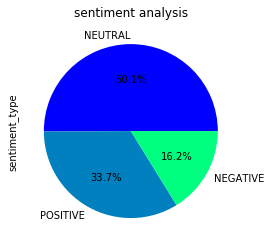

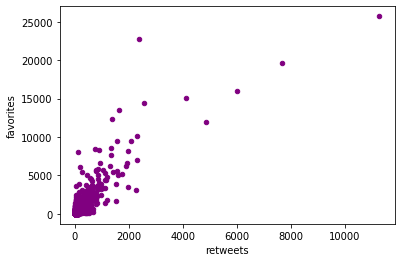

In [3]:
print("THE PIE CHART")
df.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis", colormap = "winter", autopct='%1.1f%%')

data.plot.scatter(x="retweets", y="favorites", color="purple")
data

THE PIE CHART


C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

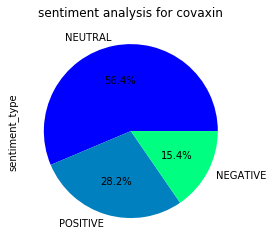

In [5]:
co = data[(data.hashtags=="['COVAXIN']")]
co.head()
co['scores'] = co['text'].apply(lambda text: sid.polarity_scores(text))
co['compound'] = co['scores'].apply(lambda score_dict: score_dict['compound'])
co['sentiment_type']=''
co.loc[co.compound>0,'sentiment_type']='POSITIVE'
co.loc[co.compound==0,'sentiment_type']='NEUTRAL'
co.loc[co.compound<0,'sentiment_type']='NEGATIVE'
print("THE PIE CHART")
co.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis for covaxin", colormap = "winter", autopct='%1.1f%%')

In [7]:

data.nunique()

user_location       23817
user_followers      20979
user_friends         7878
user_favourites     36283
user_verified           2
date               201094
text               205186
hashtags            55100
retweets              419
favorites             938
is_retweet              1
dtype: int64

In [8]:
data.describe()

,user_followers,user_friends,user_favourites,retweets,favorites
count,2.069670e+05,206967.000000,2.069670e+05,206967.000000,206967.000000
mean,9.356921e+04,983.137118,1.187433e+04,2.389091,10.334483
std,8.188852e+05,5390.710356,3.869035e+04,44.710131,160.316483
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,5.900000e+01,25.000000,5.700000e+01,0.000000,0.000000
50%,3.390000e+02,227.000000,9.520000e+02,0.000000,0.000000
75%,1.521000e+03,786.000000,7.130000e+03,0.000000,2.000000
max,1.620117e+07,582461.000000,1.221784e+06,11288.000000,25724.000000


In [26]:
data["user_location"].value_counts()

Unkown place                      61326
Bengaluru, India                  17340
India                              7317
New Delhi, India                   2778
Toronto, Canada  and Worldwide     2653
                                  ...  
Bonifacio Global City Taguig          1
STILL hot & humid & buggy.            1
Nextlalpan, México                    1
Winnipeg Manitoba Canada              1
Dade City, FL                         1
Name: user_location, Length: 23817, dtype: int64

THE PIE CHART


C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

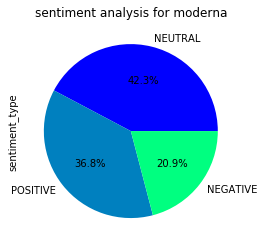

In [6]:
c = data[(data.hashtags=="['Moderna']")]
c.head()
c['scores'] = c['text'].apply(lambda text: sid.polarity_scores(text))
c['compound'] = c['scores'].apply(lambda score_dict: score_dict['compound'])
c['sentiment_type']=''
c.loc[c.compound>0,'sentiment_type']='POSITIVE'
c.loc[c.compound==0,'sentiment_type']='NEUTRAL'
c.loc[c.compound<0,'sentiment_type']='NEGATIVE'
print("THE PIE CHART")
c.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis for moderna", colormap = "winter", autopct='%1.1f%%')

THE PIE CHART


C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\harin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

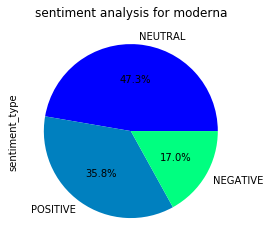

In [4]:
cp = data[(data.user_location=="India")]
cp.head()
cp['scores'] = cp['text'].apply(lambda text: sid.polarity_scores(text))
cp['compound'] = cp['scores'].apply(lambda score_dict: score_dict['compound'])
cp['sentiment_type']=''
cp.loc[cp.compound>0,'sentiment_type']='POSITIVE'
cp.loc[cp.compound==0,'sentiment_type']='NEUTRAL'
cp.loc[cp.compound<0,'sentiment_type']='NEGATIVE'
print("THE PIE CHART")
cp.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis for moderna", colormap = "winter", autopct='%1.1f%%')